<a href="https://colab.research.google.com/github/Zee1000/Woman-Techsters-Fellowship---Machine-Learning/blob/main/Individual_Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Full Name:** Zintle Thandile Mgwelo <br>
**Outlook Email:** ztmgwelo@outlook.com <br>
**WTF ID:** WTF/2025/6802


In [ ]:
#Data handling
import pandas as pd
import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Train/Test Split
from sklearn.model_selection import train_test_split

#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Makes My Notebook cleaner
import warnings
warnings.filterwarnings('ignore')

#Importing my dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/HR_comma_sep 1.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**QUESTION 1 - EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df["left"].value_counts()

,count
left,
0,11428
1,3571


In [ ]:
round(df["left"].mean(), 2)

np.float64(0.24)

In [ ]:
df.corr(numeric_only = True) ["left"].sort_values(ascending = False)

,left
left,1.000000
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
promotion_last_5years,-0.061788
Work_accident,-0.154622
satisfaction_level,-0.388375


FINDINGS:

From the correlation analysis, satisfaction level has the strongest relationship with employee turnover (-0.39). This means employees with lower satisfaction are more likely to leave the company.



Other variables such as work accidents, promotions, and time spent at the company show weaker relationships with turnover.



Conclusion: Employee satisfaction is the most important factor affecting retention.





**QUESTION 2 - PLOTTED SALARY LEVELS VS STAYED/LEFT**

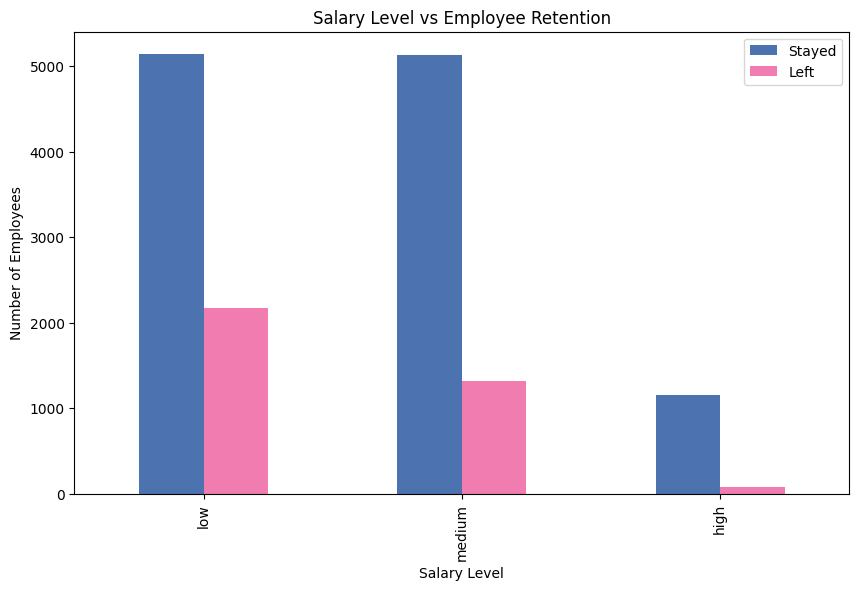

In [ ]:
df["salary"] = pd.Categorical(df["salary"], categories=["low", "medium", "high"], ordered=True)

salary_retention = pd.crosstab(df["salary"], df["left"])
salary_retention.plot(kind = "bar", color = ["#4C72B0", "#F17CB0"], figsize = (10, 6))
plt.title("Salary Level vs Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(["Stayed", "Left"])
plt.show()

FINDINGS:

The bar chart shows that employees with low salaries have the highest number of people leaving the company.



Employees with medium salaries also leave, but fewer than those in the low salary group.



Employees with high salaries have the lowest number of resignations.



Conclusion: Lower salary levels are associated with higher employee turnover.


**QUESTION 3 - PLOTTED DEPARTMENT VS STAYED/LEFT**

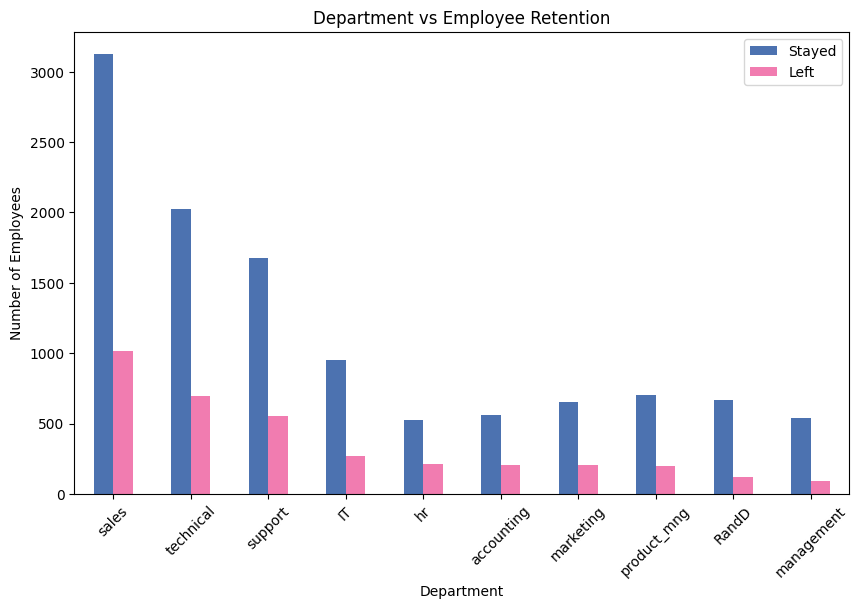

In [ ]:
pd.crosstab(df["Department"], df["left"]).sort_values(by=1, ascending = False).plot(kind="bar", color=["#4C72B0", "#F17CB0"], figsize = (10, 6))

plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

FINDINGS:

The bar chart shows that employee turnover differs across departments.



The Sales department has the highest number of employees leaving, followed by Technical and Support.



Other departments such as IT, HR, and Management have fewer employees leaving.



Conclusion: Employee turnover varies by department, with Sales experiencing the highest level of resignations.

**QUESTION 4 - BUILT A LOGISTIC REGRESSION MODEL**

In [ ]:
#Defined X & y
X = df[["satisfaction_level", "time_spend_company"]]
y = df["left"]

In [ ]:
#Import & Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Import & Train
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

FINDINGS:

A logistic regression model was built using the most important variables identified earlier (such as satisfaction level and time spent at the company).



The data was split into training and testing sets to evaluate the model’s performance.



The model was trained to predict whether an employee will leave or stay based on these variables.



Conclusion: The model uses key factors affecting retention to predict employee turnover.

**QUESTION 5 - MEASURED THE MODEL'S ACCURACY**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
round(accuracy, 2)

Accuracy: 0.7483333333333333


0.75

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85      2294
           1       0.44      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



FINDINGS:

The logistic regression model achieved an accuracy of 75%, meaning it correctly predicted employee retention outcomes 75% of the time.



The model performs well in identifying employees who stayed but is less accurate in predicting those who left.



Conclusion: The model provides reasonable predictions, but its ability to detect employees who leave can be improved.